In [2]:
!pip install tdmclient numpy scipy opencv-python tqdm


  Using cached tdmclient-0.1.21-py3-none-any.whl.metadata (78 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
  Using cached websockets-15.0.1-cp313-cp313-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.8 kB)
  Using cached zeroconf-0.148.0-cp313-cp313-manylinux_2_36_x86_64.whl.metadata (6.3 kB)
  Using cached ifaddr-0.2.0-py3-none-any.whl.metadata (4.9 kB)
Using cached tdmclient-0.1.21-py3-none-any.whl (109 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (67.0 MB)
Using cached websockets-15.0.1-cp313-cp313-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (182 kB)
Using cached zeroconf-0.148.0-cp313-cp313-manylinux_2_36_x86_64.whl (2.1 MB)
Using cached ifaddr-0.2.0-py3-none-any.whl (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [tdmclient]/5 [opencv-python]


In [1]:
import numpy as np
from scipy.ndimage import distance_transform_edt
import cv2
import tqdm
from Computer_vision import cv as com
import Filtering as flt 
from Global_Nav import global_nav as gb

In [ ]:
# Initiate the communication between the Thymio and the computer
from tdmclient import ClientAsync, aw
client = ClientAsync()
node = await client.wait_for_node()
await node.lock() 

In [2]:
#================HYPERPARAMETESRS======================

#REAL SiZE OF THE ENVIRONEMENT (cm)
L = 113.5
W = 81.3
Ratio = L/W

#SiZE IN PIXEL OF THE CORRECTED MAP
Y_res = 480
SIZE = [Y_res, int(Y_res*Ratio)]

#FILTERING PARAMETERS FOR THE ORIGINAL IMAGE
B1_O = 10
B2_O = 80
B3_O = 80
C1_O = 0.5
C2_O = 1.5
M1_O = 8
CL1_O = 2.0

#FILTERING PARAMETERS FOR THE CORRECTED IMAGE
B1_C = 8
B2_C = 80
B3_C = 80
C1_C = 0.4
C2_C = 1.6
M1_C = 5
CL1_C = 4.0

#FILTERING PARAMETERS FOR ROBOT DETECTION
B1_T = 15
B2_T = 100
B3_T = 80
C1_T = 0.4
C2_T = 1.6
M1_T = 5
CL1_C = 4.0


#PARAMETERS TO DETECT THE ENV
Min_area_env = 1000   #Min area in pixel of the env
Env_approx = 0.02

#PARAMETERS TO DETECT THE OBSTACLES
Min_area_obs = 1000   #Min area in pixel of the env
Square_approx = 0.05

#PARAMETERS TO DETECT GOAL
Min_area_goal = 50
Max_area_goal = 10000

#PARAMETERS TO DETECT THE ROBOT
Min_area_rob = 100   #Min area in pixel of the env
Rob_approx = 0.05

#ROBOT CARACTERISTICS
R_ROBOT = 20


#SYMBOLS FOR THE MAP
FREE_SPACE = 0
OCCUPIED_SPACE = -1
GOAL = -3

DEBUG = True

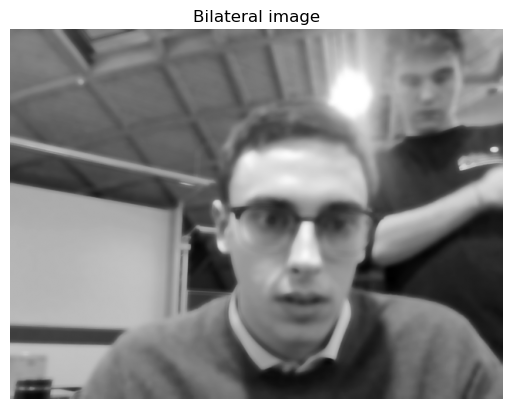

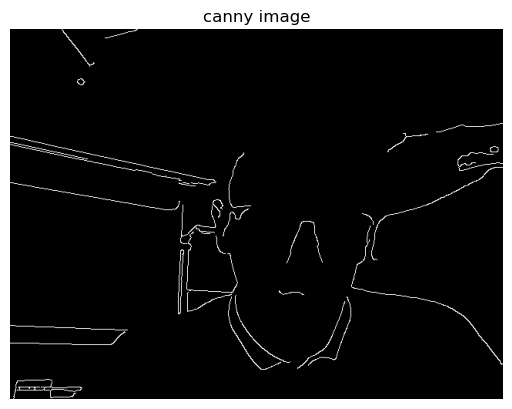

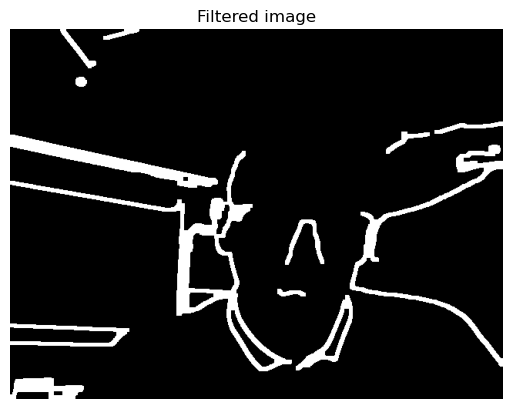

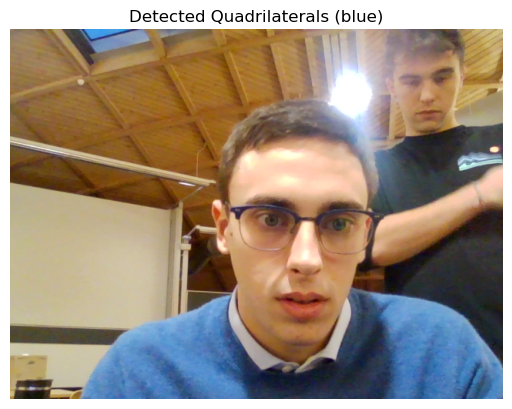

[]
ERROR : SHEET is EMPTY


UnboundLocalError: cannot access local variable 'sheet_ordered' where it is not associated with a value

In [ ]:
if DEBUG : 
    import matplotlib.pyplot as plt
    %matplotlib inline
#GLOBAL FRAMEWORK TO USE VISION
#EXECUTE CELL ABOVE WITH DEBUG = TRUE FOR TUNING UNTIL EVERYTHING IS CORRECTLY FILTERED AND FOUND
cap = cv2.VideoCapture("/dev/video2")
    
if not cap.isOpened():
    print("Could not access webcam")


#INITIALIZATION
#GET A FRAME
img = com.get_picture_optimized(cap)
#COMPUTE TRANSFORMATION MATRIX
matrix = com.matrix_perspective(img)
#CORRECT IMAGE
transformed_image = com.convert_perspective(img,matrix)



In [ ]:
#PLOTTING
if DEBUG: 
    plt.figure()
    plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
    plt.title("Perspective Corrected Image")
    plt.axis('off')
    plt.show()


#GET GLOBAL MAP
global_map = com.get_map(transformed_image)

#GET ROBOT POSITION AND ORIENTATION
robot = com.get_robot(transformed_image)


length = 100
end_x = int(robot[0][0] + length * np.cos(robot[1]))
end_y = int(robot[0][1] + length * np.sin(robot[1]))
end_point = (end_x, end_y)
if DEBUG : 
    global_map4plot = global_map.copy()
    cv2.arrowedLine(global_map4plot, robot[0], end_point, color=(2, 2, 2), thickness=10)
    plt.imshow(global_map4plot)
    plt.axis('off')
    plt.show()


In [ ]:
path = gb.a_star(global_map, robot[1], 1/10)

In [ ]:
## HERE : make infinite loop that launches Filtering, motion and local avoidance

while ... 